# Notícias G1 - 5. Classificação com KNN

Será feita a classificação das notícias de categoria desconhecida com base no modelo treinado a partir da técnica KNN e da massa de dados com categoria conhecida.

## Imports:

Importes de bibliotecas usadas com frequência no código.

In [1]:
import pandas as pd
import numpy as np

## Recuperando Dados Gravados:


Recuperando dados gravados após cálculo de TF-IDF e criação de matrizes esparças.

In [2]:
df_classificar = pd.read_csv("noticias_g1_noticias_classificar.csv")
df_tfidf_classificar = pd.read_csv("noticias_g1_tfidf_massa_classificar.csv")
df_tfidf_treino = pd.read_csv("noticias_g1_tfidf_massa_treino.csv")
df_tfidf_teste = pd.read_csv("noticias_g1_tfidf_massa_teste.csv")
df_cat_treino = pd.read_csv("noticias_g1_categorias_treino.csv")
df_cat_teste = pd.read_csv("noticias_g1_categorias_teste.csv")

print(df_classificar.shape, df_tfidf_classificar.shape, 
      df_tfidf_treino.shape, df_cat_treino.shape, 
      df_tfidf_teste.shape, df_cat_teste.shape)

(2111, 5) (2111, 2442) (1206, 2442) (1206, 1) (517, 2442) (517, 1)


## Criando Matrizes Esparças:

Transformando os DataFrames em matrizes esparças para utilizar na classificação com KNN.

In [3]:
from scipy.sparse import coo_matrix, vstack
sm_classificar = coo_matrix(df_tfidf_classificar)
sm_treino = coo_matrix(df_tfidf_treino)
sm_teste = coo_matrix(df_tfidf_teste)
sm_cat_treino = np.array(df_cat_treino)
sm_cat_teste = np.array(df_cat_teste)

print(sm_classificar.shape, sm_treino.shape, sm_cat_treino.shape,
      sm_teste.shape, sm_cat_teste.shape)

(2111, 2442) (1206, 2442) (1206, 1) (517, 2442) (517, 1)


## KNN - Treinamento, Teste e Acurácia:

Realiza o treinamento para a classificação, em seguida faz a previsão com a massa de teste e calcula a acurácia.

In [4]:
# Definindo Variáveis do problema:
X_train = sm_treino
X_test = sm_teste
y_train = sm_cat_treino
y_test = sm_cat_teste

# Treinando:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

# Testando:
y_chapeu = neigh.predict(X_test)

# Resultado, onde cada valor é o grupo de uma notícia que deve ser identificada pelo indice:
sum([c==t for c, t in zip(y_chapeu, y_test)])/len(y_chapeu)

/Users/edprata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


array([0.91295938])

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print('Acurácia: ', round(accuracy_score(y_test, y_chapeu), 3))
print('Recall  : ', round(np.mean(recall_score(y_test, y_chapeu, average=None, labels=np.unique(y_chapeu))), 3))
print('Precisão: ', round(np.mean(precision_score(y_test, y_chapeu, average=None)), 3))
print('F1      : ', round(np.mean(f1_score(y_test, y_chapeu, average=None, labels=np.unique(y_chapeu))), 3))

Acurácia:  0.913
Recall  :  0.731
Precisão:  0.781
F1      :  0.753


## KNN - Classificação:

Classifica a massa de dados (notícias) cuja categoria é desconhecida.

In [6]:
classificacao = neigh.predict(sm_classificar)
print(classificacao, classificacao.shape)

['economia' 'economia' 'politica' ... 'pop-arte' 'pop-arte' 'economia'] (2111,)


## Análise dos Resultados: Distribuição por Categoria

Elabora gráficos para comparar a distribuição dos dados na massa de treino, de teste, e de classificação (cuja categoria é desconhecida).

In [7]:
# Calculando a distribuição:

from collections import Counter, OrderedDict

counter = sorted(Counter(df_cat_teste['cat']).items(), key=lambda i: i[0])
dist_teste = pd.DataFrame(counter, columns=['cat', 'qtd'])

counter = sorted(Counter(y_chapeu).items(), key=lambda i: i[0])
dist_teste_ = pd.DataFrame(counter, columns=['cat', 'qtd'])

counter = sorted(Counter(classificacao).items(), key=lambda i: i[0])
dist_classificacao = pd.DataFrame(counter, columns=['cat', 'qtd'])

print(dist_teste.shape, dist_teste_.shape, dist_classificacao.shape)

(6, 2) (6, 2) (6, 2)


/Users/edprata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


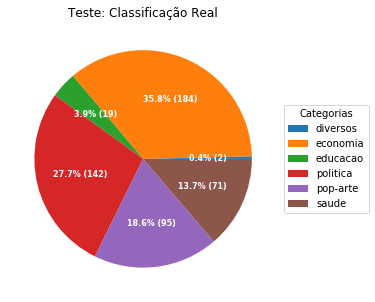

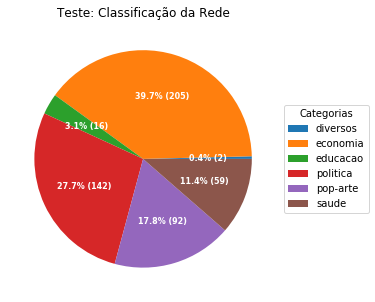

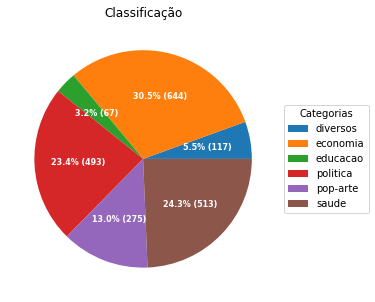

In [16]:
import matplotlib.pyplot as plt

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

def pie(title, legend, data, label):
  fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
  wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))
  ax.legend(wedges, label, title=legend, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
  plt.setp(autotexts, size=8, weight="bold")
  ax.set_title(title)
  plt.show()

pie("Teste: Classificação Real", "Categorias", dist_teste[['qtd']], dist_teste['cat'])
pie("Teste: Classificação da Rede", "Categorias", dist_teste_[['qtd']], dist_teste_['cat'])
pie("Classificação", "Categorias", dist_classificacao[['qtd']], dist_classificacao['cat'])

É perceptível a semelhança entre os conjuntos de dados com o tratamento que foi dados. Contudo, em experiementos anteriores, o resultado não ficou tão ajustado. Foi preciso agrupar categorias com pouca representatividade e criar a categoria diversos assim como aglutinar ciencia-e-saude com bemestar.

### Gráfico de Barras Comparando Real com Predito na Massa de Teste

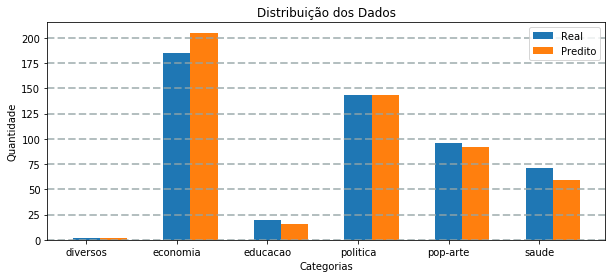

In [9]:
plt.figure(figsize=[10,4])
plt.title("Distribuição dos Dados")
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.xticks(range(6), dist_teste['cat'])
plt.bar(np.arange(6), dist_teste['qtd'], width=0.3, label='Real')
plt.bar(np.arange(6) + 0.3, dist_teste_['qtd'], width=0.3, label='Predito')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.show();

## Análise de Resultados: Verificação por Amostragem:

Análise manual de uma amostra dos dados para verificar a eficiência da classificação.

### Incluindo a classificação do KNN no DataFrame de notícias:

As categorias obtidas pela classificação serão incorporadas ao DataFrame com as notícias.

In [10]:
df_classificar['categoria'] = classificacao
df_classificar.index = range(0, df_classificar.shape[0])
df_classificar.shape

(2111, 5)

### Verificando amostra de resultados:

Aqui é selecionado aleatóriamente uma quantidade de notícias que foi analisada visualmente para constatar se a classificação dada foi ou não coerente.

In [11]:
df_classificar

,categoria,dado_tratado,texto,titulo,url
0,economia,"['entend', 'ampl', 'coaliz', 'tir', 'netanyahu...",O Parlamento de Israel confirmou neste doming...,Entenda como uma ampla coalizão tirou Netanyah...,https://g1.globo.com/mundo/noticia/2021/06/13/...
1,economia,"['milion', 'direit', 'naftal', 'bennett', 'nov...","Milionário do setor de tecnologia, Naftali Be...","Milionário de direita: quem é Naftali Bennett,...",https://g1.globo.com/mundo/noticia/2021/06/13/...
2,politica,"['govern', 'sp', 'antecip', 'dat', 'vacin', 'v...",O governo de São Paulo antecipou em 30 dias o...,Governo de SP antecipa datas de vacinação; vej...,https://g1.globo.com/sp/sao-paulo/noticia/2021...
3,politica,"['pm', 'mat', 'hom', 'dentr', 'carr', 'sp', 'a...",A Polícia Militar instaurou um inquérito poli...,PMs que mataram homens dentro de carro em SP s...,https://g1.globo.com/sp/sao-paulo/noticia/2021...
4,economia,"['rainh', 'elizabeth', 'ii', 'receb', 'biden',...",A rainha Elizabeth II recebeu neste domingo (...,Rainha Elizabeth II recebe Biden e a mulher no...,https://g1.globo.com/mundo/noticia/2021/06/13/...
...,...,...,...,...,...
2106,diversos,"['eua', 'enfrent', 'ond', 'cal', 'histór', 'pi...",Os Estados Unidos atravessam uma seca históri...,EUA enfrentam onda de calor histórica e pior s...,https://g1.globo.com/mundo/noticia/2021/06/29/...
2107,politica,"['desab', 'flór', 'ges', 'diss', 'abril', 'dan...",Uma carta escrita pelo presidente da associaç...,Desabamento na Flórida: gestor disse em abril ...,https://g1.globo.com/mundo/noticia/2021/06/29/...
2108,pop-arte,"['psiquiatr', 'conden', 'ano', 'pris', 'abus',...",Um médico psiquiatra foi condenado a mais de ...,Psiquiatra é condenado a mais de 20 anos de pr...,https://g1.globo.com/rj/rio-de-janeiro/noticia...
2109,pop-arte,"['alpin', 'escal', 'mont', 'everest', 'mãe', '...",Jess Wedel foi diagnosticada com câncer no ov...,Alpinista escala Monte Everest com a mãe de 61...,https://g1.globo.com/olha-que-legal/noticia/20...


In [12]:
y = 0
for x in [30, 79, 103, 171, 205, 247, 315, 374, 409, 467, 515, 581, 607, 658, 719, 754, 811, 888, 933, 967, 1023]:
  noticia = df_classificar.iloc[x]
  print(x, noticia['categoria'])
  print(noticia['titulo'])
  print(noticia['texto'])
  y = y + 1
  print('')

30 politica
Parlamento de Israel confirma nova coalizão de governo e tira Netanyahu do poder
 Israel inicia, neste domingo (13), uma nova etapa de sua história depois que uma votação no Parlamento ratificou uma "coalizão de mudança" no poder, derrubando o premiê Benjamin Netanyahu.  O Knesset se reuniu numa sessão especial para que o líder da oposição, o centrista Yair Lapid, e o chefe da direita radical Naftali Bennett apresentassem a equipe do novo governo, que em seguida foi ratificada em votação. Bennet é o novo premiê.  Na avaliação de Guga Chacra, comentarista da GloboNews, este não deve ser o fim da carreira de Benjamin Netanyahu. Assista ao comentário:  A coalizão é bastante heterogênea, pois inclui:  A frente foi formada com o principal objetivo de remover Netanyahu e conseguiu uma apertada maioria necessária 60 votos a favor, 59 votos contra e uma abstenção.  Netanyahu, de 71 anos, está sendo julgado há um ano por suspeita de corrupção. Protestos pedindo sua renúncia ocorrem 

### Classificando a amostra:

Nesse ponto criamos um vetor com o resultado da avaliação visual classificando cada registro como uma seguintes opções:
* Desconhecida: Significa que a notícia é de uma categoria não conhecida pelo modelo, pois não estava representada na massa de treino. Exemplos desse caso são notícias sobre segurança pública e saúde que não estava presente ou pelo menos não estava classificada na massa de treino.
* NOK: São as notícias que o modelo de fato classificou errado, pois havia categoria compatível, mas ele classificou de forma incorreta.
* OK: São as notícias classificadas corretamente.

In [13]:
avaliacao = ['OK', 'Desconhecida', 'Desconhecida', 'Desconhecida', 
             'Desconhecida', 'NOK', 'OK', 'OK', 'OK', 'OK', 'OK', 
             'OK', 'OK', 'NOK', 'Desconhecida', 'Desconhecida', 
             'Desconhecida', 'Desconhecida', 'OK', 'NOK', 'OK']

### Medindo o Desempenho:

Será usada a acurácia como medida de desempenho da amostra.

In [14]:
sum([a=='OK' for a in avaliacao])/len(avaliacao)

0.47619047619047616

### Distribuição da Amostra Verificada:

Gráfico com a distribuição do resultado da avaliação dos dados por amostragem.

/Users/edprata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


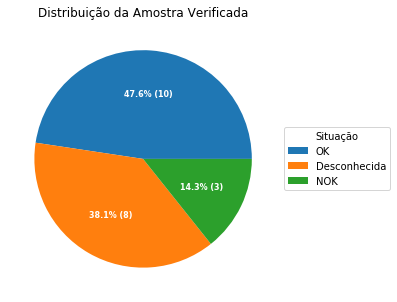

In [15]:
counter = pd.DataFrame(Counter(avaliacao).items(), columns=['status', 'value'])
title = "Distribuição da Amostra Verificada"
pie(title, "Situação", counter[['value']], (counter['status']).values)